# Brain Tumor Classification (MRI)

**Definition:** A brain tumor is an abnormal growth of brain cells, whether in the brain tissue itself or in surrounding tissues such as the meninges or nerves associated with the brain. These tumors can be benign (non-cancerous) or malignant (cancerous).



**Severity:** The severity of a tumor depends on its size, location, and rate of growth. Since the brain is the control center for the entire body, any pressure or damage to a specific part of the brain can cause major problems in vital body functions such as movement, sensation, vision, and memory. Cancerous tumors are more dangerous because they grow quickly and spread to other areas of the brain or body.



**Types:**



**Glioma:**



This is a type of tumor that affects brain cells called "glial cells", which are responsible for supporting and protecting nerve cells. Glioma usually appears in the brain or spine.

On MRI: You will find an irregular area or spot in the brain that is darker or lighter than the rest of the areas.

**Meningioma:**



This is a tumor that appears in the membranes that cover the brain and spinal cord (meninges). This tumor is usually benign and does not cause many problems unless it is large.

On MRI: You may see an oval or round area around the brain that is separate from the brain tissue itself.



**Pituitary Tumor:**



This is a tumor that occurs in the pituitary gland, which is a small gland at the base of the brain that controls the body's hormones.

On MRI: You will see the pituitary gland larger than normal or you may find small lumps around the gland.

In [1]:
# General Imports

import tensorflow as tf

import pandas as pd

import numpy as np

import random

import os



# Visualization

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px



# Warnings

import warnings

warnings.filterwarnings("ignore")



# Building Model

from keras.utils import plot_model

from tensorflow.keras import models

from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Flatten

from tensorflow.keras.optimizers import legacy





# Training Model

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential



# Model Evaluation

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import ConfusionMatrixDisplay



# Data Processing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.preprocessing.image import array_to_img

from tensorflow.keras.preprocessing.image import load_img

## Importing Data

In [2]:
import kagglehub



# Download latest version

path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")



print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [3]:
classes=[]

filename='/kaggle/input/brain-tumor-mri-dataset'

for sub_folder in os.listdir(os.path.join(filename,'Training')):

    classes.append(sub_folder)

print(classes)

['pituitary', 'notumor', 'meningioma', 'glioma']


In [4]:
train_path='/kaggle/input/brain-tumor-mri-dataset/Training/'

test_path='/kaggle/input/brain-tumor-mri-dataset/Testing/'

In [5]:
img_list=[]

label_list=[]

for label in classes:

    for img_file in (os.path.join(train_path, label)):

        img_list.append(train_path+label+'/'+img_file)

        label_list.append(label)

In [6]:
train_data = pd.DataFrame({'Image':img_list,'Label':label_list})

train_data

,Image,Label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
...,...,...
215,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
216,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
217,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
218,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


In [7]:
img_list=[]

label_list=[]

for label in classes:

    for img_file in os.listdir(test_path+label):

        img_list.append(test_path+label+'/'+img_file)

        label_list.append(label)

In [8]:
test_data = pd.DataFrame({'Image':img_list,'Label':label_list})

test_data

,Image,Label
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
...,...,...
1306,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1307,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1308,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1309,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma


## Data Visualization

In [9]:
def Plot_Classes(BASE_URL, Rows=2, Columns=5):





  plt.figure(figsize = (25, 8))



  image_count = 1



  for directory in os.listdir(BASE_URL):



      if directory[0] != '.':



          Max_Random = len(os.listdir(os.path.join(BASE_URL,directory)))



          Random_Number = np.random.randint(0, Max_Random)



          for i, file in enumerate(os.listdir(BASE_URL + directory)):



              if i == Random_Number:



                  fig = plt.subplot(Rows, Columns, image_count)

                  image_count += 1



                  image = plt.imread(BASE_URL + directory + '/' + file)

                  plt.imshow(image)



                  plt.title(directory)



                  break

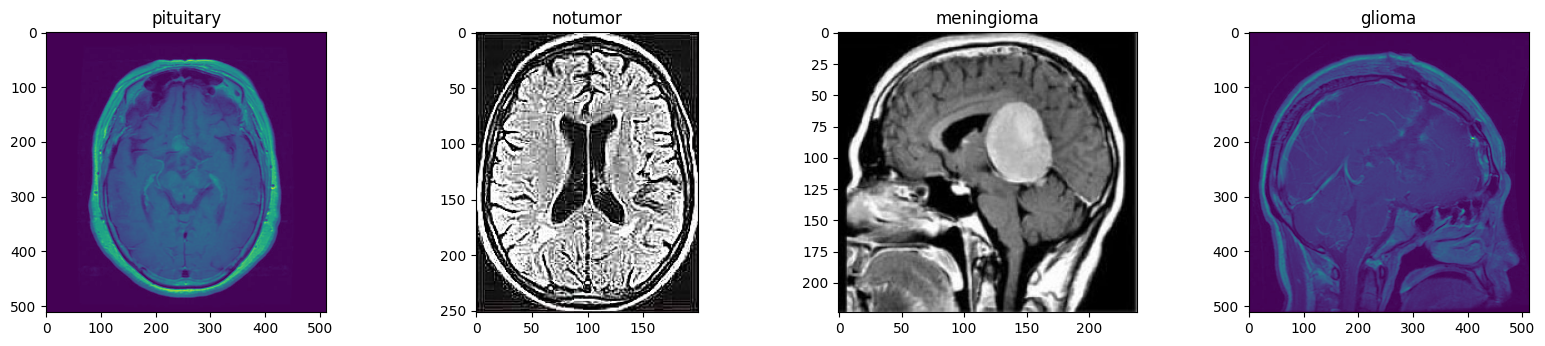

In [10]:
Plot_Classes(train_path)

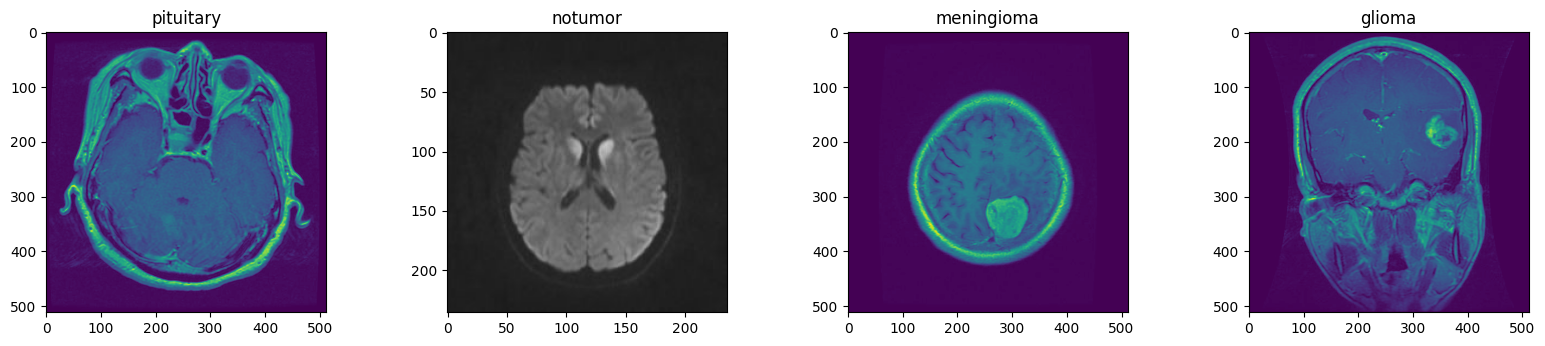

In [11]:
Plot_Classes(test_path)

In [12]:
train_data['Label'].value_counts()

Label
meningioma    57
pituitary     56
notumor       54
glioma        53
Name: count, dtype: int64

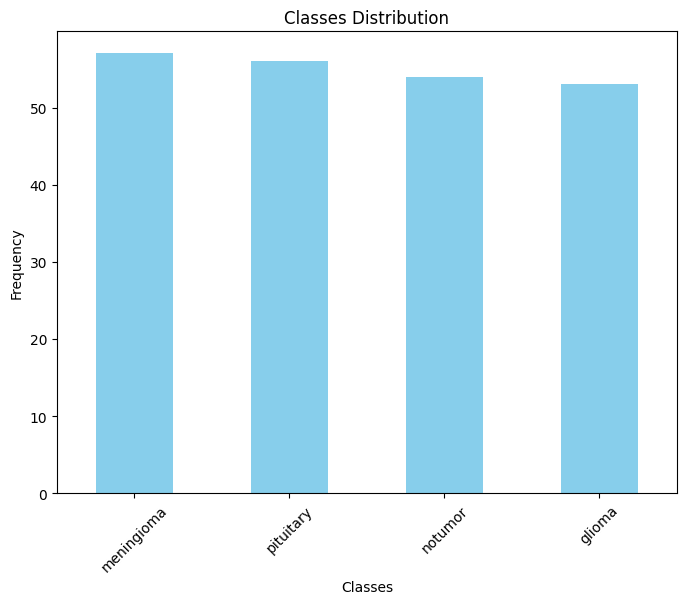

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each label in your data
label_counts = train_data['Label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')  # Use bar chart for categorical data
plt.title("Classes Distribution")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate labels for readability if needed
plt.show()


In [14]:
test_data['Label'].value_counts()

Label
notumor       405
meningioma    306
pituitary     300
glioma        300
Name: count, dtype: int64

In [15]:
import plotly.express as px

# Assuming `test_data` is a DataFrame with a column "Label"
fig = px.histogram(test_data, y="Label", color="Label", title="Classes Distribution")

# Show the plot
fig.show()


## Data Preprocessing

In [16]:
# Image size

image_size = (150, 150)



# Training batch size

batch_size = 32

In [17]:
# Data augmentation and preprocessing

train_datagen = ImageDataGenerator(rescale=1./255,

                                   validation_split=0.15, 

                                   rotation_range=10,

                                   brightness_range=(0.85, 1.15),

                                   width_shift_range=0.002,

                                   height_shift_range=0.002,

                                   shear_range=12.5,

                                   zoom_range=0,

                                   horizontal_flip=True,

                                   vertical_flip=False,

                                   fill_mode="nearest")



val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)



# Creating training data generator

train_generator = train_datagen.flow_from_directory(train_path,

                                                    target_size=image_size,

                                                    batch_size=batch_size,

                                                    class_mode='categorical',

                                                    subset='training',  

                                                    seed=0)



# Creating validation data generator

val_generator = val_datagen.flow_from_directory(train_path,

                                                target_size=image_size,

                                                batch_size=batch_size,

                                                class_mode='categorical',

                                                subset='validation', 

                                                seed=0)



# No augmentation of the test data, just rescaling

test_datagen = ImageDataGenerator(rescale=1./255)



# applying the generator to testing data with constant seed

test_generator = test_datagen.flow_from_directory(test_path,

                                                  target_size=image_size,

                                                  batch_size=batch_size,

                                                  class_mode="categorical",

                                                  shuffle=False,

                                                  seed=0)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [18]:
def show_ImageDataGenerator(ImageDataGenerator, num_samples=5, figsize=(12, 12), save=False):

    """

    Function to viusalize how the ImageDataGenerator augments the data

    """



    # Generate augmented samples

    # Use __next__() instead of next()

    augmented_samples = train_generator.__next__()



    # Extract images from the batch

    images = augmented_samples[0][:num_samples]



    # Display the augmented images

    fig, axes = plt.subplots(1, num_samples, figsize=figsize)



    for i, ax in enumerate(axes):

        ax.imshow(images[i])

        ax.axis('off')



    plt.tight_layout()



    if save:

        plt.savefig('show_ImageDataGenerator.pdf')



    plt.show()

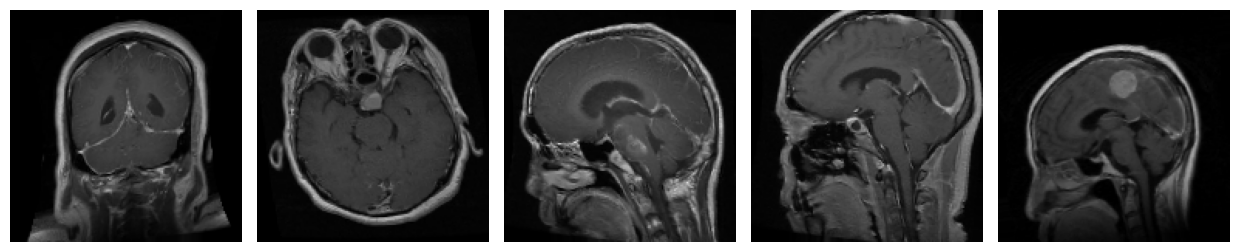

In [19]:
show_ImageDataGenerator(train_datagen, num_samples=5, figsize=(12.5, 8), save=False)

### Training Setup

In [20]:
# Image shape: height, width, RBG

image_shape = (image_size[0], image_size[1], 3)





print(f'Image shape: {image_shape}')

print(f'Batch size: {batch_size}')

print(f'Number of Train batches: {len(train_generator)}')

print(f'Number of Validation batches: {len(val_generator)}')

print(f'Number of Testing batches: {len(test_generator)}')

Image shape: (150, 150, 3)
Batch size: 32
Number of Train batches: 152
Number of Validation batches: 27
Number of Testing batches: 41


In [21]:
Classes_Map = train_generator.class_indices



num_classes = len(Classes_Map)



print("Number of Classes:", num_classes)

Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [22]:
def plot_curves(history):



  loss = history.history["loss"]

  val_loss = history.history["val_loss"]



  accuracy = history.history["accuracy"]

  val_accuracy = history.history["val_accuracy"]



  epochs = range(len(history.history["loss"]))



  plt.figure(figsize=(15,5))

  plt.style.use('ggplot')





  plt.subplot(1, 2, 1)

  plt.plot(epochs, loss, 'bo-' , label = "TrainL oss")

  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")

  plt.title("Loss")

  plt.xlabel("epochs")

  plt.legend()





  plt.subplot(1, 2, 2)

  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")

  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")

  plt.title("Accuracy")

  plt.xlabel("epochs")

  plt.legend()



  plt.style.use('default')

In [23]:
def CM(model, test_generator, categories):


    from sklearn.metrics import confusion_matrix

    # Predictions on test dataset

    predictions = model.predict(test_generator)

    predicted_categories = np.argmax(predictions, axis=1)

    true_categories = test_generator.classes



    # Create a confusion matrix

    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)

    print(f"Classification Report for {model}:")

    print(classification_report(true_categories, predicted_categories, target_names=categories))



    return confusion_matrix_array





def calculate_metrics(confusion_matrix, categories):

    """

    Function to calculate important metrics for multi-classification problems.

    """

    # Calculating 4 different metrics

    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)

    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

    f1_score = 2 * (precision * recall) / (precision + recall)

    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)



    # Printing the results based on each category

    for i, category in enumerate(categories):

        print(f"Class: {category.title()}")

        print(f"Precision: {precision[i]:.3f}")

        print(f"Recall: {recall[i]:.3f}")

        print(f"F1-Score: {f1_score[i]:.3f}\n")



    # Showing the total accuracy of the model

    print(f"\nAccuracy: {accuracy:.3f}")

In [24]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Optional: Local weights file path (in case of download issues)
#local_weights_path = "/path/to/resnet101_weights_tf_dim_ordering_tf_kernels_notop.h5"

#base_model_resnet = ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Uncomment and adjust the path if using local weights
base_model_resnet = ResNet101(weights=None, include_top=False, input_shape=(150, 150, 3))
#base_model_resnet.load_weights(local_weights_path)

# for layer in base_model_resnet.layers[:-10]:
#     layer.trainable = False

# for layer in base_model_resnet.layers[-10:]:
#     layer.trainable = True

# Add custom classification head
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model_resnet = Model(inputs=base_model_resnet.input, outputs=output)

model_resnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model_resnet.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 43,709,316 (166.74 MB)

 Trainable params: 43,603,972 (166.34 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [25]:
resnet_history = model_resnet.fit(train_generator,epochs=15,validation_data=val_generator)

Epoch 1/15


I0000 00:00:1738681739.461020     126 service.cc:145] XLA service 0x7bcdbc002780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738681739.461089     126 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1738681739.461095     126 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1738681785.983605     126 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_53', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1738681786.056995     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


152/152 ━━━━━━━━━━━━━━━━━━━━ 222s 782ms/step - accuracy: 0.4644 - loss: 1.3245 - val_accuracy: 0.2316 - val_loss: 1.7206
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 50s 315ms/step - accuracy: 0.6370 - loss: 0.9146 - val_accuracy: 0.2713 - val_loss: 2.5238
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 53s 339ms/step - accuracy: 0.6994 - loss: 0.7744 - val_accuracy: 0.4105 - val_loss: 2.0308
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 53s 334ms/step - accuracy: 0.7096 - loss: 0.7414 - val_accuracy: 0.6725 - val_loss: 0.9357
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 53s 335ms/step - accuracy: 0.7514 - loss: 0.6157 - val_accuracy: 0.6749 - val_loss: 1.0075
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 53s 337ms/step - accuracy: 0.7566 - loss: 0.6082 - val_accuracy: 0.7053 - val_loss: 0.7458
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 53s 338ms/step - accuracy: 0.7909 - loss: 0.5275 - val_accuracy: 0.8035 - val_loss: 1.6517
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 53s 337ms/step - accuracy: 0.8149 - loss: 0.4644 - va

### ResNet101 Model Evaluation

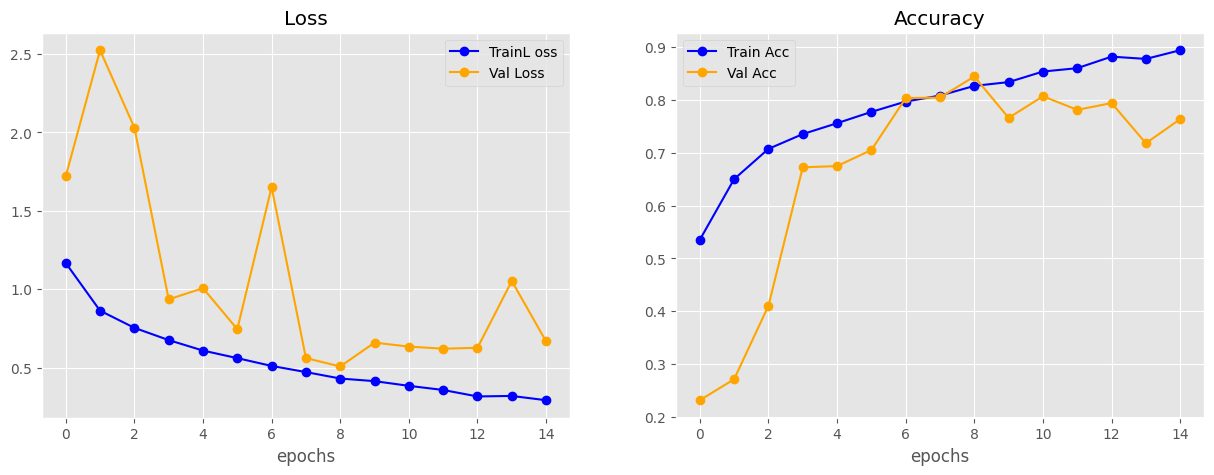

In [26]:
plot_curves(resnet_history)

In [27]:
loss, accuracy = model_resnet.evaluate(test_generator)

print(f"Test Loss: {loss:0.5f}")

print(f"Test Accuracy: {accuracy:0.5f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.8040 - loss: 0.4295
Test Loss: 0.45170
Test Accuracy: 0.81693


41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step
Classification Report for <Functional name=functional_1, built=True>:
              precision    recall  f1-score   support

   pituitary       0.71      0.86      0.78       300
     notumor       0.78      0.57      0.66       306
  meningioma       0.87      0.97      0.92       405
      glioma       0.91      0.82      0.86       300

    accuracy                           0.82      1311
   macro avg       0.82      0.80      0.80      1311
weighted avg       0.82      0.82      0.81      1311



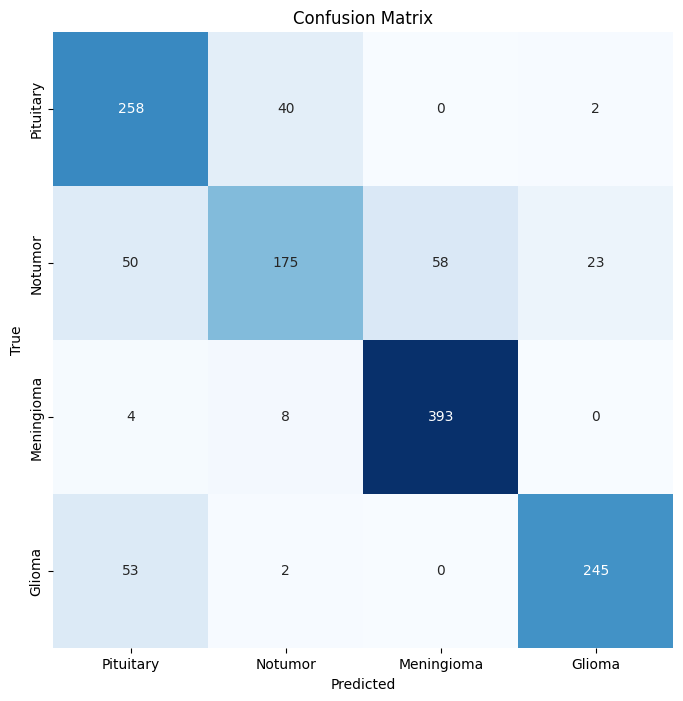

In [28]:
# Plotting confusion matrix

confusion_matrix = CM(model=model_resnet, test_generator=test_generator, categories=classes)



plt.figure(figsize=(8,8))

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("True")

plt.xticks(ticks=np.arange(4) + 0.5,

           labels=[name.title() for name in classes], ha='center')

plt.yticks(ticks=np.arange(4) + 0.5,

           labels=[name.title() for name in classes], va='center')

plt.show()

{'pituitary': 0.003, 'notumor': 0.1, 'meningioma': 99.897, 'glioma': 0.0}
{'pituitary': 2.009, 'notumor': 3.887, 'meningioma': 94.089, 'glioma': 0.016}
{'pituitary': 0.0, 'notumor': 13.935, 'meningioma': 86.065, 'glioma': 0.0}
{'pituitary': 0.0, 'notumor': 0.432, 'meningioma': 99.567, 'glioma': 0.001}
{'pituitary': 1.791, 'notumor': 42.672, 'meningioma': 54.971, 'glioma': 0.566}
{'pituitary': 44.166, 'notumor': 20.567, 'meningioma': 35.037, 'glioma': 0.23}
{'pituitary': 0.0, 'notumor': 0.432, 'meningioma': 99.567, 'glioma': 0.001}
{'pituitary': 2.009, 'notumor': 3.887, 'meningioma': 94.089, 'glioma': 0.016}
{'pituitary': 96.686, 'notumor': 2.953, 'meningioma': 0.36, 'glioma': 0.001}
{'pituitary': 0.003, 'notumor': 17.154, 'meningioma': 82.81, 'glioma': 0.033}


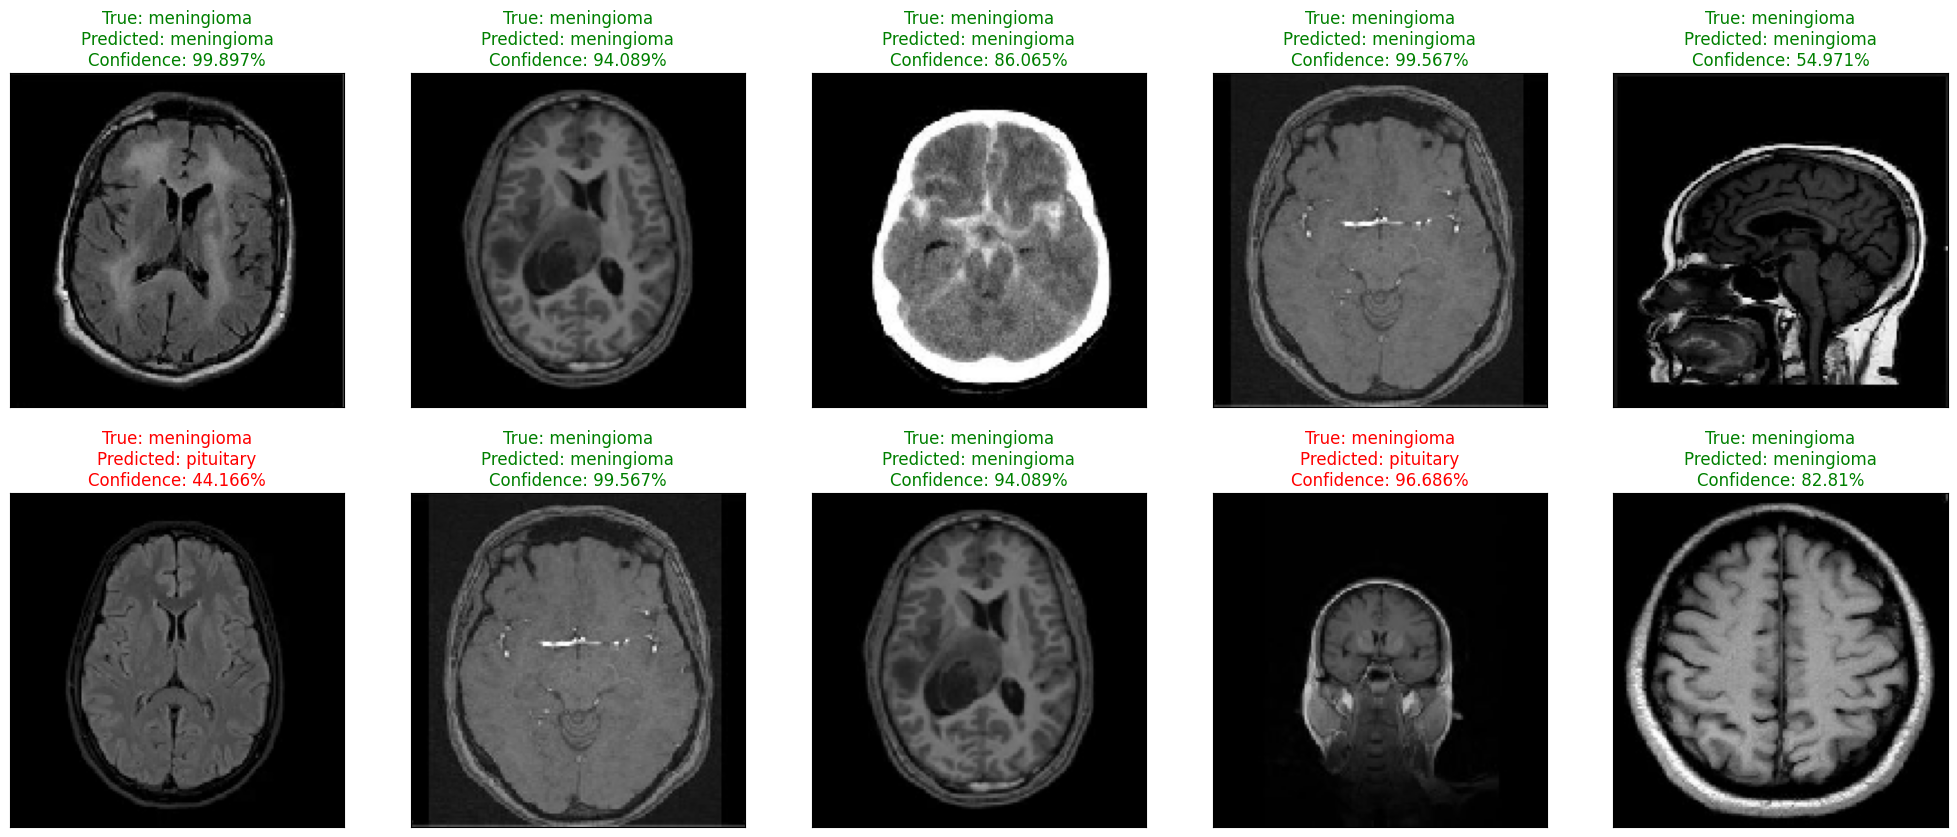

<Figure size 640x480 with 0 Axes>

In [29]:
# Display 10 random pictures predictions from the dataset with their labels



Random_batch = np.random.randint(0, len(test_generator))



Random_Img_Index = np.random.randint(0, batch_size , 10)



fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),

                        subplot_kw={'xticks': [], 'yticks': []})



for i, ax in enumerate(axes.flat):



    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]



    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])



    Model_Predictions = model_resnet.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0)



    Model_Highest_Prediction = np.argmax(Model_Predictions)



    Model_Predictions_Map = { c: round(p*100,3) for (c,p) in zip (classes, Model_Predictions.tolist()[0] ) }



    ax.imshow(Random_Img)



    Pred_Class = classes[Model_Highest_Prediction]



    if classes[Random_Img_Label] == Pred_Class:

      color = "green"

    else:

      color = "red"

    ax.set_title(f"True: {classes[Random_Img_Label]}\nPredicted: {Pred_Class}\nConfidence: {Model_Predictions_Map[Pred_Class]}%",

          color=color)

    print(Model_Predictions_Map)

plt.show()

plt.tight_layout()

In [30]:
model_resnet.save('model.h5')
